# **0.3 Reducción dimensionalidad**

### PCA

In [1]:
import pandas as pd
import os

In [2]:
data_dir = r"C:\Users\Macarena Madrid\Desktop\alzheimer-target-prediction\data\processed\features"
X_GO = pd.read_csv(os.path.join(data_dir, "dataset_completo.csv"))

In [3]:
data_dr = r"C:\Users\Macarena Madrid\Desktop\alzheimer-target-prediction\data\processed\raw_cleaned"
targets = pd.read_csv(os.path.join(data_dr, "target_clean.csv"))


In [4]:
X_GO = X_GO.merge(targets[['Node_id', 'Target_group']], on='Node_id', how='left')

print(X_GO[['Node_id', 'Target_group']].head())

  Node_id Target_group
0   A2ML1           T4
1    AAK1           T2
2   AARS1           T4
3   AARS2           T4
4    AASS           T4


In [5]:
print(X_GO.columns)  # Para ver dónde empiezan los términos GO


Index(['Node_id', 'GO:0000002_BP', 'GO:0000012_BP', 'GO:0000014_MF',
       'GO:0000018_BP', 'GO:0000022_BP', 'GO:0000027_BP', 'GO:0000028_BP',
       'GO:0000030_MF', 'GO:0000038_BP',
       ...
       'GO:2001251_BP', 'GO:2001252_BP', 'GO:2001256_BP', 'GO:2001257_BP',
       'GO:2001258_BP', 'GO:2001259_BP', 'GO:2001267_BP', 'GO:2001269_BP',
       'GO:2001280_BP', 'Target_group'],
      dtype='object', length=6930)


C:\Users\Macarena Madrid\AppData\Local\Temp\ipykernel_20852\1216913804.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='Target_group', data=X_GO, order=order, palette='viridis')
C:\Users\Macarena Madrid\AppData\Local\Temp\ipykernel_20852\1216913804.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  perc = target_perc[i]


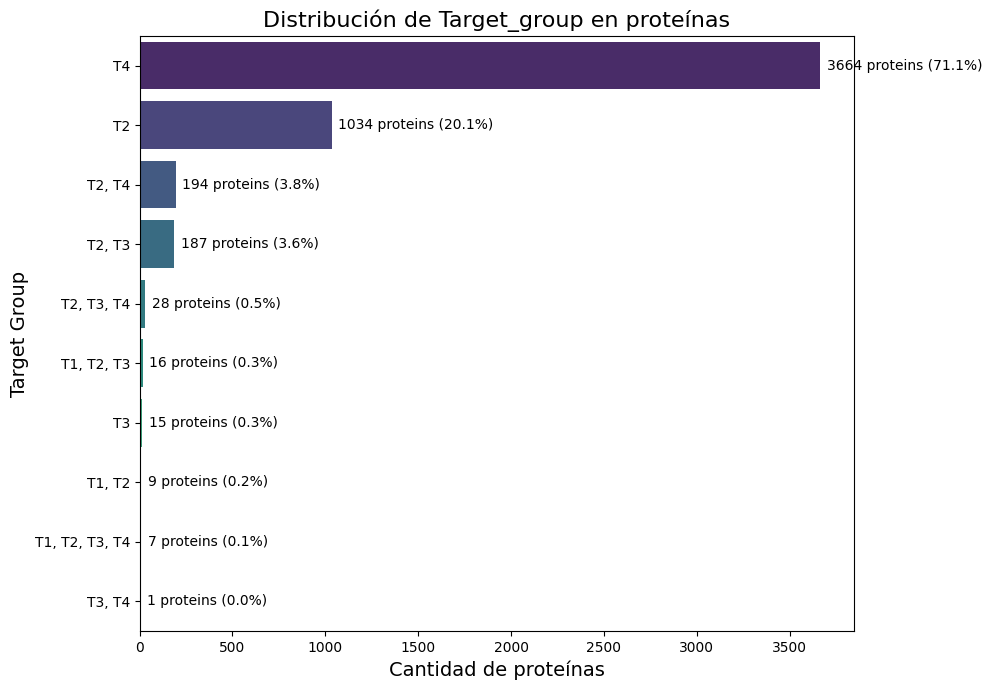

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conteo de grupos y porcentaje
target_counts = X_GO['Target_group'].value_counts()
target_perc = 100 * target_counts / target_counts.sum()

# Ordenar índices para mantener consistencia
order = target_counts.index

plt.figure(figsize=(10,7))
ax = sns.countplot(y='Target_group', data=X_GO, order=order, palette='viridis')

# Agregar etiquetas con número y porcentaje a cada barra
for i, count in enumerate(target_counts):
    perc = target_perc[i]
    label = f'{count} proteins ({perc:.1f}%)'
    ax.text(count + max(target_counts)*0.01, i, label, va='center', fontsize=10)

plt.title('Distribución de Target_group en proteínas', fontsize=16)
plt.xlabel('Cantidad de proteínas', fontsize=14)
plt.ylabel('Target Group', fontsize=14)
plt.tight_layout()
plt.show()


In [158]:
# Asumiendo que la primera columna es 'Node_id' y la última es 'Target_group'
go_cols = [col for col in X_GO.columns if col not in ['Node_id', 'Target_group']]

X_pca = X_GO[go_cols].values  # Solo las columnas GO, como matriz numpy
y = X_GO['Target_group']      # Etiqueta de grupo para colorear en el gráfico


In [159]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_pca_scaled = scaler.fit_transform(X_pca)


In [133]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)            # Queremos dos ejes (PC1, PC2)
components = pca.fit_transform(X_pca_scaled)


In [131]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_plot = pd.DataFrame({
    'PC1': components[:, 0],
    'PC2': components[:, 1],
    'Target_group': y
})


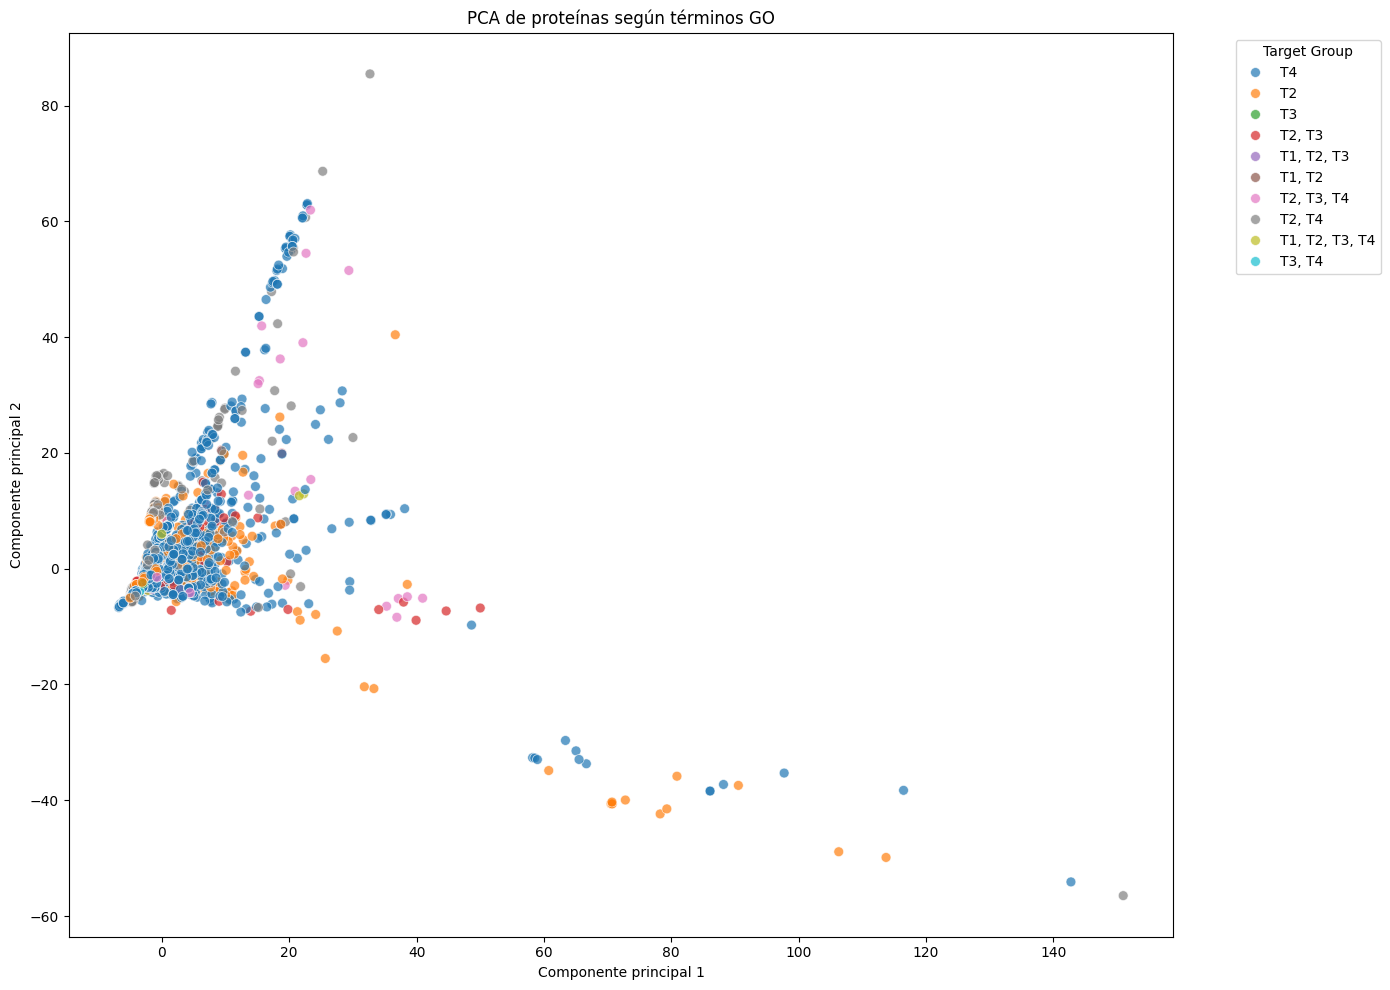

In [ ]:

plt.figure(figsize=(14,10))
sns.scatterplot(
    data=df_plot,
    x='PC1', y='PC2',
    hue='Target_group',         # Cada grupo es de color diferente
    palette='tab10',
    alpha=0.7,
    s=50
    
)


plt.title('PCA de proteínas según términos GO')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Target Group')
plt.tight_layout()
plt.show()


In [122]:
print('Varianza explicada por las dos primeras componentes:', pca.explained_variance_ratio_)


Varianza explicada por las dos primeras componentes: [0.01050867 0.00918757]


PC1 explica un 1.05% de la varianza total (0.0105 = 1.05%).

PC2 explica un 0.92% de la varianza total (0.0092 = 0.92%).

Juntas, las dos primeras componentes explican solo un ~2% de la varianza de tu matriz original.



### Varianza acumulada
busca el punto donre agregar más componente ya no aumenta mucho la varianza explicada.

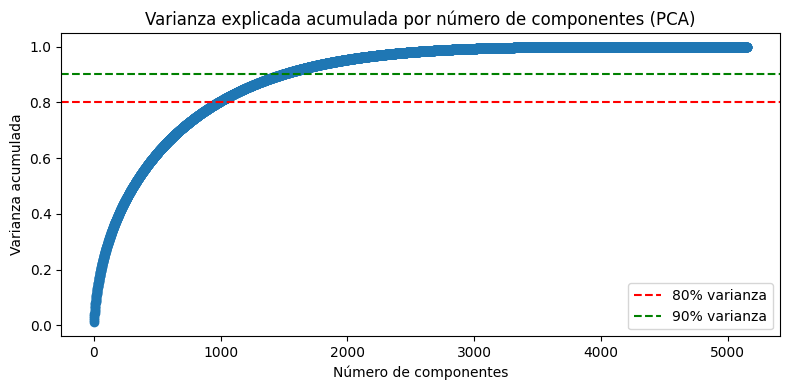

In [136]:
from sklearn.decomposition import PCA

n_max = min(X_pca.shape[0], X_pca.shape[1])
pca = PCA(n_components=n_max)  # Usa el máximo permitido

X_pca_scaled = scaler.fit_transform(X_pca)
pca.fit(X_pca_scaled)

# Varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = varianza_explicada.cumsum()

import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(range(1, len(varianza_acumulada)+1), varianza_acumulada, marker='o')
plt.axhline(0.8, color='r', linestyle='--', label='80% varianza')
plt.axhline(0.9, color='g', linestyle='--', label='90% varianza')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.title('Varianza explicada acumulada por número de componentes (PCA)')
plt.legend()
plt.tight_layout()
plt.show()


In [138]:
umbral = 0.80  # 90%
n_comp = np.argmax(varianza_acumulada >= umbral) + 1
print(f"Para explicar al menos el 90% de la varianza necesitas {n_comp} componentes.")


Para explicar al menos el 90% de la varianza necesitas 982 componentes.


In [139]:
# Proyecta tus datos a 982 componentes (80% varianza)
pca_80 = PCA(n_components=982)
X_pca_80 = pca_80.fit_transform(X_pca_scaled)

# Guarda el resultado en un CSV
pd.DataFrame(X_pca_80).to_csv("X_GO_PCA_80.csv", index=False)


## Modelo de predicción

Accuracy: 0.802
Reporte de clasificación:
                precision    recall  f1-score   support

        T1, T2       0.00      0.00      0.00         2
    T1, T2, T3       0.00      0.00      0.00         3
T1, T2, T3, T4       0.00      0.00      0.00         1
            T2       0.84      0.32      0.47       207
        T2, T3       0.75      0.24      0.37        37
    T2, T3, T4       1.00      0.17      0.29         6
        T2, T4       0.85      0.56      0.68        39
            T3       1.00      0.33      0.50         3
            T4       0.80      0.99      0.88       733

      accuracy                           0.80      1031
     macro avg       0.58      0.29      0.35      1031
  weighted avg       0.80      0.80      0.76      1031



c:\Users\Macarena Madrid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Macarena Madrid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Macarena Madrid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

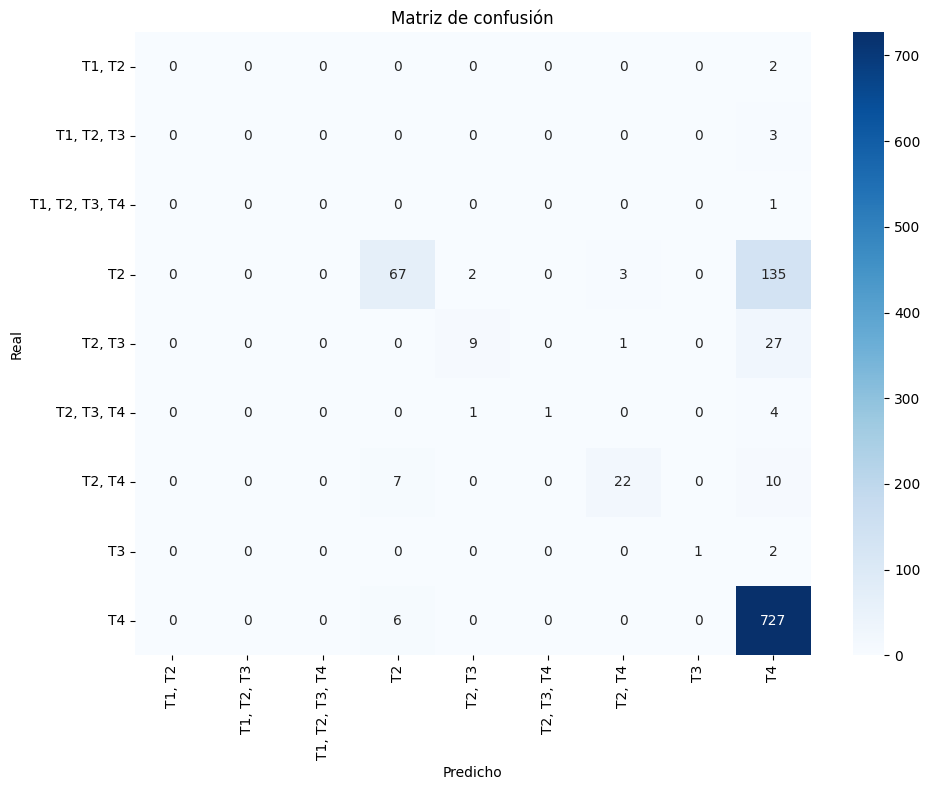

Accuracy: 0.802
Reporte de clasificación:
                precision    recall  f1-score   support

        T1, T2       0.00      0.00      0.00         2
    T1, T2, T3       0.00      0.00      0.00         3
T1, T2, T3, T4       0.00      0.00      0.00         1
            T2       0.84      0.32      0.47       207
        T2, T3       0.75      0.24      0.37        37
    T2, T3, T4       1.00      0.17      0.29         6
        T2, T4       0.85      0.56      0.68        39
            T3       1.00      0.33      0.50         3
            T4       0.80      0.99      0.88       733

      accuracy                           0.80      1031
     macro avg       0.58      0.29      0.35      1031
  weighted avg       0.80      0.80      0.76      1031

Precision macro promedio: 0.581
Recall macro promedio: 0.291
F1-score macro promedio: 0.353


c:\Users\Macarena Madrid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Macarena Madrid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Macarena Madrid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
# Rutas de archivos
data_dir = r"C:\Users\Macarena Madrid\Desktop\alzheimer-target-prediction\notebooks"

# Carga matriz de componentes principales (PCA)
X_pca_80 = pd.read_csv(os.path.join(data_dir, "X_GO_PCA_80.csv"))
# Carga identificador y Target_group (asegúrate que coincida el orden con el PCA)
y = X_GO['Target_group'].astype(str)

# Elimina clases con menos de 2 instancias (evita errores en stratify)
counts = y.value_counts()
mask = y.isin(counts[counts >= 2].index)

X_filtrado = X_pca_80[mask].values      # matriz reducida de PCA
y_filtrado = y[mask].values             # etiquetas filtradas


X_train, X_test, y_train, y_test = train_test_split(
    X_filtrado, y_filtrado, test_size=0.2, random_state=42, stratify=y_filtrado
)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de confusión')
plt.tight_layout()
plt.show()

# Luego de predecir
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)

print(f"Precision macro promedio: {precision_macro:.3f}")
print(f"Recall macro promedio: {recall_macro:.3f}")
print(f"F1-score macro promedio: {f1_macro:.3f}")


### smote

Accuracy: 0.818

Reporte de clasificación:
                precision    recall  f1-score   support

        T1, T2       0.00      0.00      0.00         2
    T1, T2, T3       0.00      0.00      0.00         3
T1, T2, T3, T4       0.00      0.00      0.00         1
            T2       0.78      0.45      0.57       207
        T2, T3       0.59      0.35      0.44        37
    T2, T3, T4       0.33      0.17      0.22         6
        T2, T4       0.83      0.62      0.71        39
            T3       1.00      0.33      0.50         3
            T4       0.83      0.97      0.90       733

      accuracy                           0.82      1031
     macro avg       0.48      0.32      0.37      1031
  weighted avg       0.81      0.82      0.80      1031



c:\Users\Macarena Madrid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Macarena Madrid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Macarena Madrid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

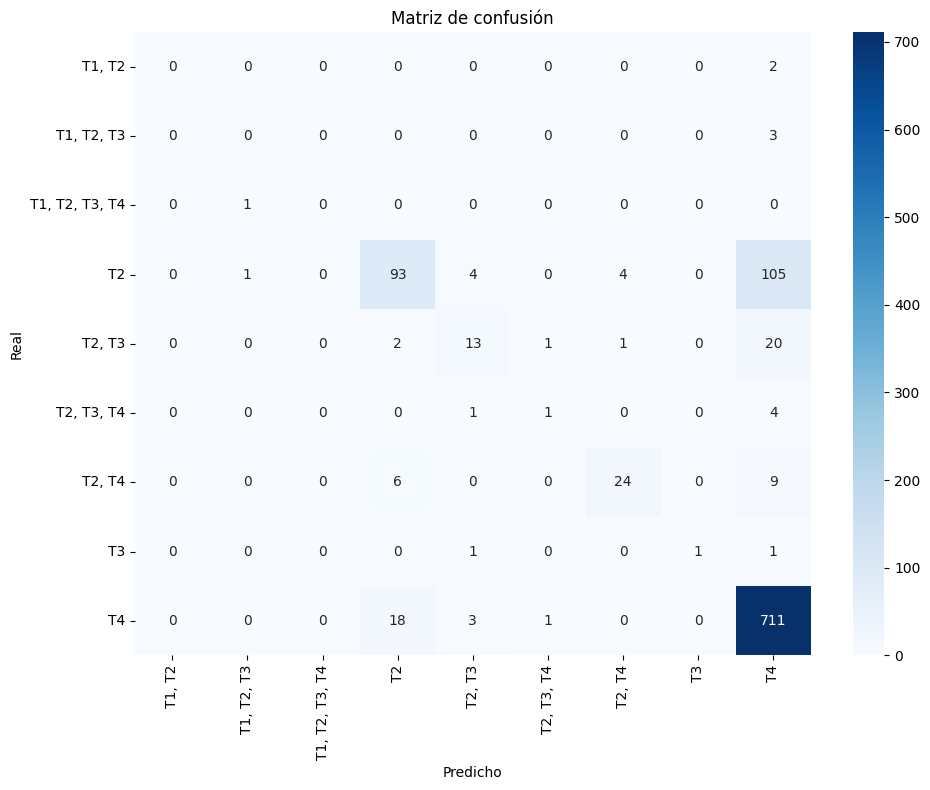

Accuracy: 0.818
Reporte de clasificación:
                precision    recall  f1-score   support

        T1, T2       0.00      0.00      0.00         2
    T1, T2, T3       0.00      0.00      0.00         3
T1, T2, T3, T4       0.00      0.00      0.00         1
            T2       0.78      0.45      0.57       207
        T2, T3       0.59      0.35      0.44        37
    T2, T3, T4       0.33      0.17      0.22         6
        T2, T4       0.83      0.62      0.71        39
            T3       1.00      0.33      0.50         3
            T4       0.83      0.97      0.90       733

      accuracy                           0.82      1031
     macro avg       0.48      0.32      0.37      1031
  weighted avg       0.81      0.82      0.80      1031

Precision macro promedio: 0.485
Recall macro promedio: 0.321
F1-score macro promedio: 0.371


c:\Users\Macarena Madrid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Macarena Madrid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Macarena Madrid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

from imblearn.over_sampling import SMOTE

# 1. Rutas y carga de datos
data_dir = r"C:\Users\Macarena Madrid\Desktop\alzheimer-target-prediction\notebooks"
X_pca_80 = pd.read_csv(os.path.join(data_dir, "X_GO_PCA_80.csv"))

y = X_GO['Target_group'].astype(str)  # Cambia 'Target_group' si es otro nombre en tu CSV

# 2. Filtra clases con menos de 2 instancias
counts = y.value_counts()
mask = y.isin(counts[counts >= 2].index)
X_filtrado = X_pca_80[mask].values
y_filtrado = y[mask].values

# 3. División train/test con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X_filtrado, y_filtrado, test_size=0.2, random_state=42, stratify=y_filtrado )

# 4. Aplicar SMOTE solo sobre el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 5. Entrenar Random Forest con datos balanceados
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_res, y_train_res)

# 6. Predecir y evaluar en test (datos originales sin SMOTE)
y_pred = clf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}\n")
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# 7. Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de confusión')
plt.tight_layout()
plt.show()  


# Luego de predecir
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)

print(f"Precision macro promedio: {precision_macro:.3f}")
print(f"Recall macro promedio: {recall_macro:.3f}")
print(f"F1-score macro promedio: {f1_macro:.3f}")

### class_weight

Reporte de clasificación - Validación cruzada
                precision    recall  f1-score   support

        T1, T2       0.00      0.00      0.00         7
    T1, T2, T3       0.50      0.08      0.13        13
T1, T2, T3, T4       0.00      0.00      0.00         6
            T2       0.84      0.17      0.29       827
        T2, T3       0.80      0.08      0.15       150
    T2, T3, T4       0.50      0.09      0.15        22
        T2, T4       0.80      0.38      0.52       155
            T3       1.00      0.08      0.15        12
            T4       0.76      1.00      0.86      2931

      accuracy                           0.76      4123
     macro avg       0.58      0.21      0.25      4123
  weighted avg       0.77      0.76      0.69      4123

Accuracy: 0.818
Reporte de clasificación ESTE !!!:
                precision    recall  f1-score   support

        T1, T2       0.00      0.00      0.00         2
    T1, T2, T3       0.00      0.00      0.00         3
T1,

c:\Users\Macarena Madrid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Macarena Madrid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Macarena Madrid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

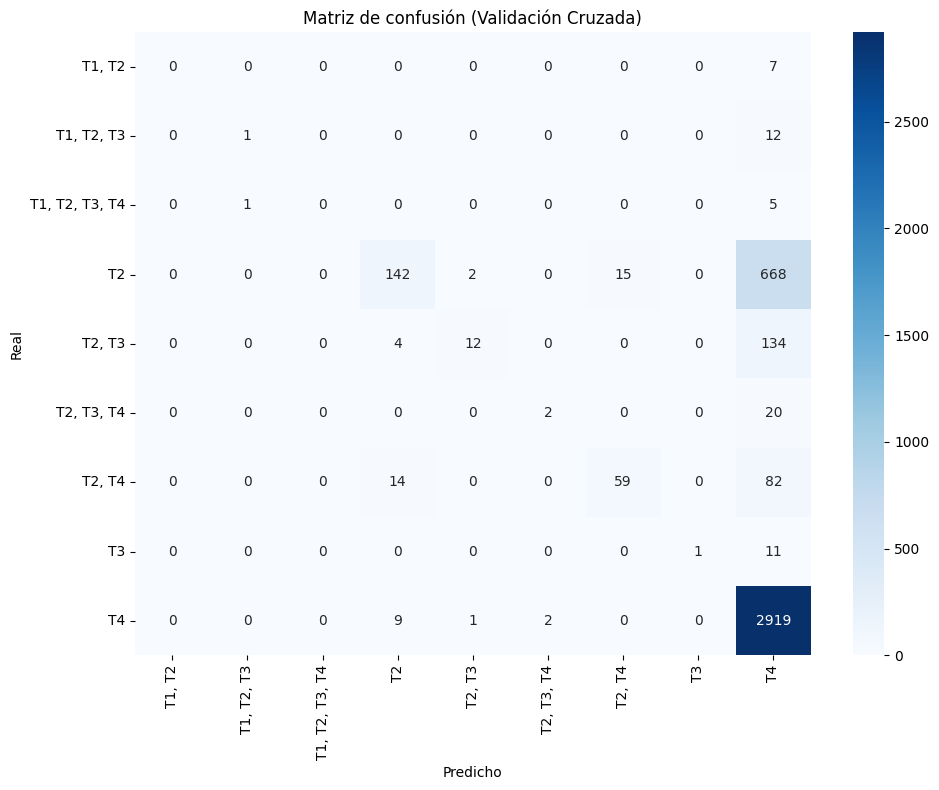

Accuracy: 0.818
Reporte de clasificación:
                precision    recall  f1-score   support

        T1, T2       0.00      0.00      0.00         2
    T1, T2, T3       0.00      0.00      0.00         3
T1, T2, T3, T4       0.00      0.00      0.00         1
            T2       0.78      0.45      0.57       207
        T2, T3       0.59      0.35      0.44        37
    T2, T3, T4       0.33      0.17      0.22         6
        T2, T4       0.83      0.62      0.71        39
            T3       1.00      0.33      0.50         3
            T4       0.83      0.97      0.90       733

      accuracy                           0.82      1031
     macro avg       0.48      0.32      0.37      1031
  weighted avg       0.81      0.82      0.80      1031

Precision macro promedio: 0.485
Recall macro promedio: 0.321
F1-score macro promedio: 0.371


c:\Users\Macarena Madrid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Macarena Madrid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Macarena Madrid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

Reporte de clasificación - Test set
                precision    recall  f1-score   support

        T1, T2       0.00      0.00      0.00         2
    T1, T2, T3       0.00      0.00      0.00         3
T1, T2, T3, T4       0.00      0.00      0.00         1
            T2       0.93      0.25      0.39       207
        T2, T3       0.88      0.19      0.31        37
    T2, T3, T4       1.00      0.17      0.29         6
        T2, T4       0.86      0.49      0.62        39
            T3       1.00      0.33      0.50         3
            T4       0.78      1.00      0.87       733

      accuracy                           0.79      1031
     macro avg       0.60      0.27      0.33      1031
  weighted avg       0.81      0.79      0.74      1031



c:\Users\Macarena Madrid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Macarena Madrid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Macarena Madrid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

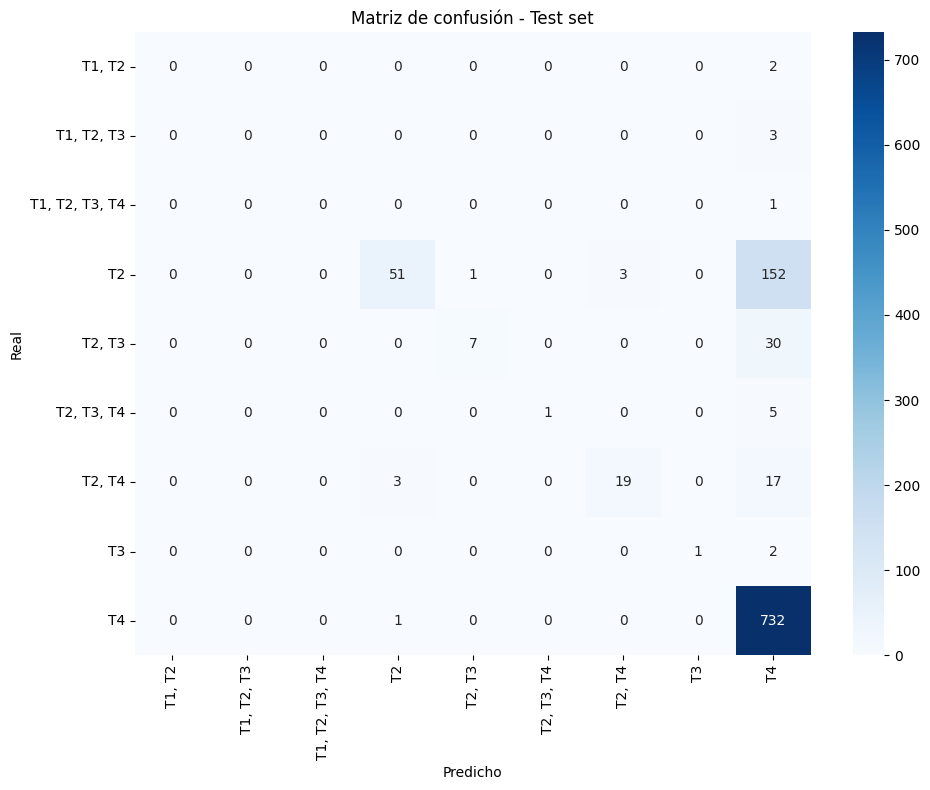

Accuracy: 0.818
Reporte de clasificación:
                precision    recall  f1-score   support

        T1, T2       0.00      0.00      0.00         2
    T1, T2, T3       0.00      0.00      0.00         3
T1, T2, T3, T4       0.00      0.00      0.00         1
            T2       0.78      0.45      0.57       207
        T2, T3       0.59      0.35      0.44        37
    T2, T3, T4       0.33      0.17      0.22         6
        T2, T4       0.83      0.62      0.71        39
            T3       1.00      0.33      0.50         3
            T4       0.83      0.97      0.90       733

      accuracy                           0.82      1031
     macro avg       0.48      0.32      0.37      1031
  weighted avg       0.81      0.82      0.80      1031

Precision macro promedio: 0.485
Recall macro promedio: 0.321
F1-score macro promedio: 0.371


c:\Users\Macarena Madrid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Macarena Madrid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Macarena Madrid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score


# 1. Rutas y carga de datos
data_dir = r"C:\Users\Macarena Madrid\Desktop\alzheimer-target-prediction\notebooks"
X_pca_80 = pd.read_csv(os.path.join(data_dir, "X_GO_PCA_80.csv"))

y = X_GO['Target_group'].astype(str)  # Cambia 'Target_group' si es otro nombre en tu CSV

# 2. Filtra clases con menos de 2 instancias
counts = y.value_counts()
mask = y.isin(counts[counts >= 2].index)
X_filtrado = X_pca_80[mask].values
y_filtrado = y[mask].values

# 2. Filtrar clases con menos de 2 ejemplos
counts = y.value_counts()
mask = y.isin(counts[counts >= 2].index)
X = X_pca_80[mask].values
y_filtered = y[mask].values

# 3. División train-test para evaluación final (opcional, puedes usar toda la data para CV)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered
)

# 4. Definir modelo con class_weight balanced_subsample
clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced_subsample',
    n_jobs=-1
)

# 5. Validación cruzada estratificada para obtener predicciones
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(clf, X_train, y_train, cv=cv, n_jobs=-1)

# 6. Evaluar resultados CV
print("Reporte de clasificación - Validación cruzada")
print(classification_report(y_train, y_pred_cv))

# Luego de predecir
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("Reporte de clasificación ESTE !!!:")
print(classification_report(y_test, y_pred))

precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)

print(f"Precision macro promedio: {precision_macro:.3f}")
print(f"Recall macro promedio: {recall_macro:.3f}")
print(f"F1-score macro promedio: {f1_macro:.3f}")
labels = np.unique(y_train)
cm = confusion_matrix(y_train, y_pred_cv, labels=labels)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de confusión (Validación Cruzada)')
plt.tight_layout()
plt.show()

# Luego de predecir
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)

print(f"Precision macro promedio: {precision_macro:.3f}")
print(f"Recall macro promedio: {recall_macro:.3f}")
print(f"F1-score macro promedio: {f1_macro:.3f}")


# 7. Finalmente, entrenar con todo el train y evaluar test
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)

print("Reporte de clasificación - Test set")
print(classification_report(y_test, y_pred_test))

cm_test = confusion_matrix(y_test, y_pred_test, labels=clf.classes_)
plt.figure(figsize=(10,8))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de confusión - Test set')
plt.tight_layout()
plt.show()


# Luego de predecir
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)

print(f"Precision macro promedio: {precision_macro:.3f}")
print(f"Recall macro promedio: {recall_macro:.3f}")
print(f"F1-score macro promedio: {f1_macro:.3f}")

### este siii

Reporte de clasificación - Validación cruzada
                precision    recall  f1-score   support

        T1, T2       0.00      0.00      0.00         7
    T1, T2, T3       0.50      0.08      0.13        13
T1, T2, T3, T4       0.00      0.00      0.00         6
            T2       0.84      0.17      0.29       827
        T2, T3       0.80      0.08      0.15       150
    T2, T3, T4       0.50      0.09      0.15        22
        T2, T4       0.80      0.38      0.52       155
            T3       1.00      0.08      0.15        12
            T4       0.76      1.00      0.86      2931

      accuracy                           0.76      4123
     macro avg       0.58      0.21      0.25      4123
  weighted avg       0.77      0.76      0.69      4123



c:\Users\Macarena Madrid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Macarena Madrid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Macarena Madrid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

Accuracy (CV): 0.761
Precision macro promedio (CV): 0.577
Recall macro promedio (CV): 0.209
F1-score macro promedio (CV): 0.250


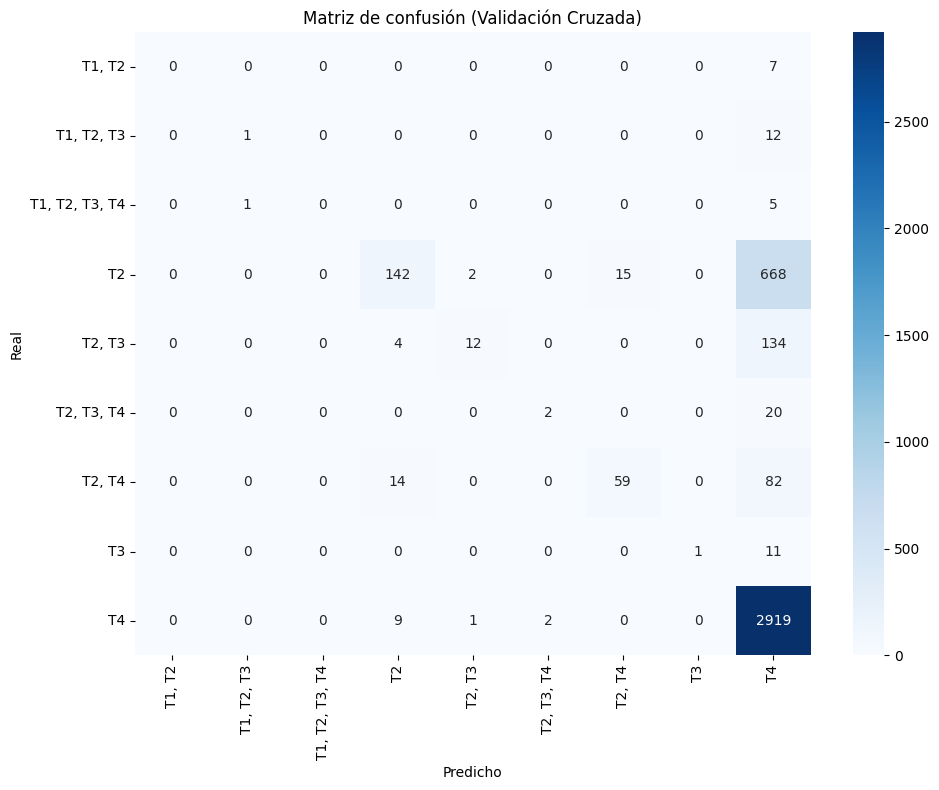

Reporte de clasificación - Test set
                precision    recall  f1-score   support

        T1, T2       0.00      0.00      0.00         2
    T1, T2, T3       0.00      0.00      0.00         3
T1, T2, T3, T4       0.00      0.00      0.00         1
            T2       0.93      0.25      0.39       207
        T2, T3       0.88      0.19      0.31        37
    T2, T3, T4       1.00      0.17      0.29         6
        T2, T4       0.86      0.49      0.62        39
            T3       1.00      0.33      0.50         3
            T4       0.78      1.00      0.87       733

      accuracy                           0.79      1031
     macro avg       0.60      0.27      0.33      1031
  weighted avg       0.81      0.79      0.74      1031

Accuracy (Test set): 0.787
Precision macro promedio (Test set): 0.605
Recall macro promedio (Test set): 0.269
F1-score macro promedio (Test set): 0.331


c:\Users\Macarena Madrid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Macarena Madrid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Macarena Madrid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

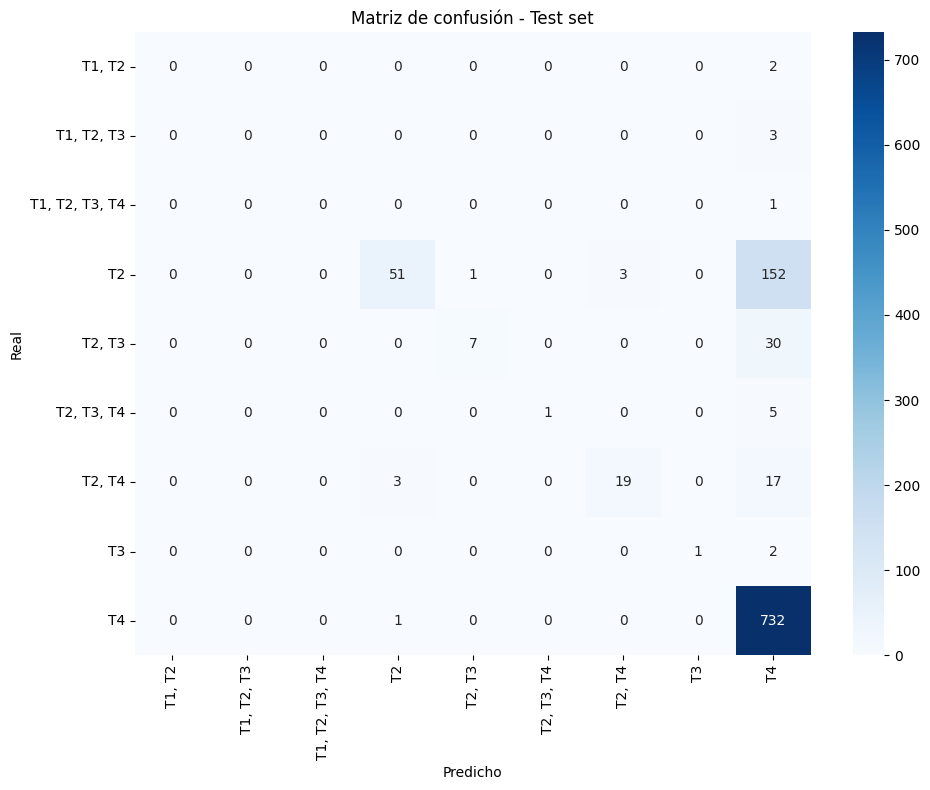

In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# 1. Rutas y carga de datos
data_dir = r"C:\Users\Macarena Madrid\Desktop\alzheimer-target-prediction\notebooks"
X_pca_80 = pd.read_csv(os.path.join(data_dir, "X_GO_PCA_80.csv"))
y = X_GO['Target_group'].astype(str)   # Cambia 'Target_group' si es otro nombre en tu CSV

# 2. Filtra clases con menos de 2 instancias
counts = y.value_counts()
mask = y.isin(counts[counts >= 2].index)
X_filtrado = X_pca_80[mask].values
y_filtrado = y[mask].values

# 3. División train-test para evaluación final (opcional, puedes usar toda la data para CV)
X_train, X_test, y_train, y_test = train_test_split(
    X_filtrado, y_filtrado, test_size=0.2, random_state=42, stratify=y_filtrado
)

# 4. Definir modelo con class_weight balanced_subsample
clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced_subsample',
    n_jobs=-1
)

# 5. Validación cruzada estratificada para obtener predicciones
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(clf, X_train, y_train, cv=cv, n_jobs=-1)

# 6. Evaluar resultados CV
print("Reporte de clasificación - Validación cruzada")
print(classification_report(y_train, y_pred_cv))

# 7. Calcular métricas macro para la validación cruzada
precision_macro_cv = precision_score(y_train, y_pred_cv, average='macro', zero_division=0)
recall_macro_cv = recall_score(y_train, y_pred_cv, average='macro', zero_division=0)
f1_macro_cv = f1_score(y_train, y_pred_cv, average='macro', zero_division=0)
accuracy_cv = accuracy_score(y_train, y_pred_cv)

print(f"Accuracy (CV): {accuracy_cv:.3f}")
print(f"Precision macro promedio (CV): {precision_macro_cv:.3f}")
print(f"Recall macro promedio (CV): {recall_macro_cv:.3f}")
print(f"F1-score macro promedio (CV): {f1_macro_cv:.3f}")

# 8. Matriz de confusión de la validación cruzada
labels = np.unique(y_train)
cm_cv = confusion_matrix(y_train, y_pred_cv, labels=labels)
plt.figure(figsize=(10,8))
sns.heatmap(cm_cv, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de confusión (Validación Cruzada)')
plt.tight_layout()
plt.show()

# 9. Finalmente, entrenar con todo el train y evaluar test
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)

print("Reporte de clasificación - Test set")
print(classification_report(y_test, y_pred_test))

# 10. Calcular métricas para el test set
precision_macro_test = precision_score(y_test, y_pred_test, average='macro', zero_division=0)
recall_macro_test = recall_score(y_test, y_pred_test, average='macro', zero_division=0)
f1_macro_test = f1_score(y_test, y_pred_test, average='macro', zero_division=0)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Accuracy (Test set): {accuracy_test:.3f}")
print(f"Precision macro promedio (Test set): {precision_macro_test:.3f}")
print(f"Recall macro promedio (Test set): {recall_macro_test:.3f}")
print(f"F1-score macro promedio (Test set): {f1_macro_test:.3f}")

# 11. Matriz de confusión del test set
cm_test = confusion_matrix(y_test, y_pred_test, labels=clf.classes_)
plt.figure(figsize=(10,8))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de confusión - Test set')
plt.tight_layout()
plt.show()


### otro

In [58]:
# Impotar librerias
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [60]:
# Definir rutas locales
data_dir = r"C:\Users\Macarena Madrid\Desktop\alzheimer-target-prediction\data\processed\features"
data_dr = r"C:\Users\Macarena Madrid\Desktop\alzheimer-target-prediction\data\processed\raw_cleaned"

# Cargar matriz GO (index = Node_id)
X_GO = pd.read_csv(os.path.join(data_dir, "dataset_completo.csv"), index_col=0)
# Cargar métricas topológicas
topo_c = pd.read_csv(os.path.join(data_dr, "topo_clean.csv"))
# Cargar etiquetas funcionales
target_labels = pd.read_csv(os.path.join(data_dr, "target_clean.csv"))

# Asegurar que todo sea string para evitar errores de indexado
X_GO.index = X_GO.index.astype(str)
topo_c['Node_id'] = topo_c['Node_id'].astype(str)
target_labels['Node_id'] = target_labels['Node_id'].astype(str)

In [61]:
# Filtrar solo los Node_id presentes en X_GO (por si acaso)
topo_c = topo_c[topo_c['Node_id'].isin(X_GO.index)].reset_index(drop=True)
target_labels = target_labels[target_labels['Node_id'].isin(X_GO.index)].reset_index(drop=True)

# Revisar cuántos quedan (deberían ser 154)
print("N° de proteínas topológicas con datos funcionales:", len(topo_c))

# Ordenar la matriz GO en el mismo orden de topo_c
X_GO_topo = X_GO.loc[topo_c['Node_id']].reset_index(drop=True)


N° de proteínas topológicas con datos funcionales: 154


In [62]:
# Unir por Node_id para obtener grupo T4, T3, etc.
topo_labels = pd.merge(topo_c, target_labels[['Node_id', 'Target_group']], on='Node_id', how='left')

print(topo_labels[['Node_id', 'Target_group']].head())
print("Distribución de Target_group:", topo_labels['Target_group'].value_counts())


   Node_id Target_group
0      AGT           T4
1     APOE           T4
2  ALDH7A1           T4
3    GLUD1           T4
4    EPHX1           T4
Distribución de Target_group: Target_group
T4    154
Name: count, dtype: int64


### PCA sobre matriz GO

In [63]:
# Normalizar matriz GO
scaler_go = StandardScaler()
X_GO_scaled = scaler_go.fit_transform(X_GO_topo)

# PCA sobre GO reducido a 20 componentes
pca_go = PCA(n_components=20, random_state=42)
X_GO_pca = pca_go.fit_transform(X_GO_scaled)

df_GO_pca_topo = pd.DataFrame(X_GO_pca, columns=[f'GO_PC{i+1}' for i in range(X_GO_pca.shape[1])])


In [64]:
# Integrar topologia + GO reducido en un solo DataFrame
# Concatenar (índices ya alineados)
combined_df = pd.concat([topo_labels.reset_index(drop=True), df_GO_pca_topo], axis=1)
print(combined_df.shape)
print(combined_df.head())


(154, 31)
   Node_id prediction        DC        BC        CC        EC       CEN  ECC  \
0      AGT         Up  0.749640  0.881329  0.922370  0.619335  0.094793  1.0   
1     APOE         Up  0.817266  0.943827  0.946559  0.655622  0.064516  1.0   
2  ALDH7A1         Up  0.274820  0.198363  0.627651  0.289315  0.400113  1.0   
3    GLUD1         Up  0.205755  0.141130  0.590557  0.068793  0.458970  1.0   
4    EPHX1         Up  0.109353  0.054785  0.352921  0.026284  0.887097  0.4   

        RAD  Conectivity_score_topo  ...   GO_PC11   GO_PC12   GO_PC13  \
0  0.956340                0.703706  ...  5.216626 -2.879988 -6.558179   
1  0.970285                0.680186  ...  0.747261  0.139721 -0.869519   
2  0.756549                0.580241  ...  0.487986 -0.296971 -1.137797   
3  0.726704                0.408576  ...  0.485271 -0.305863  0.127829   
4  0.501368                0.700345  ...  0.318899 -0.378473 -1.302223   

    GO_PC14    GO_PC15   GO_PC16    GO_PC17    GO_PC18   GO_PC19

### PCA y visualización de datos combinados

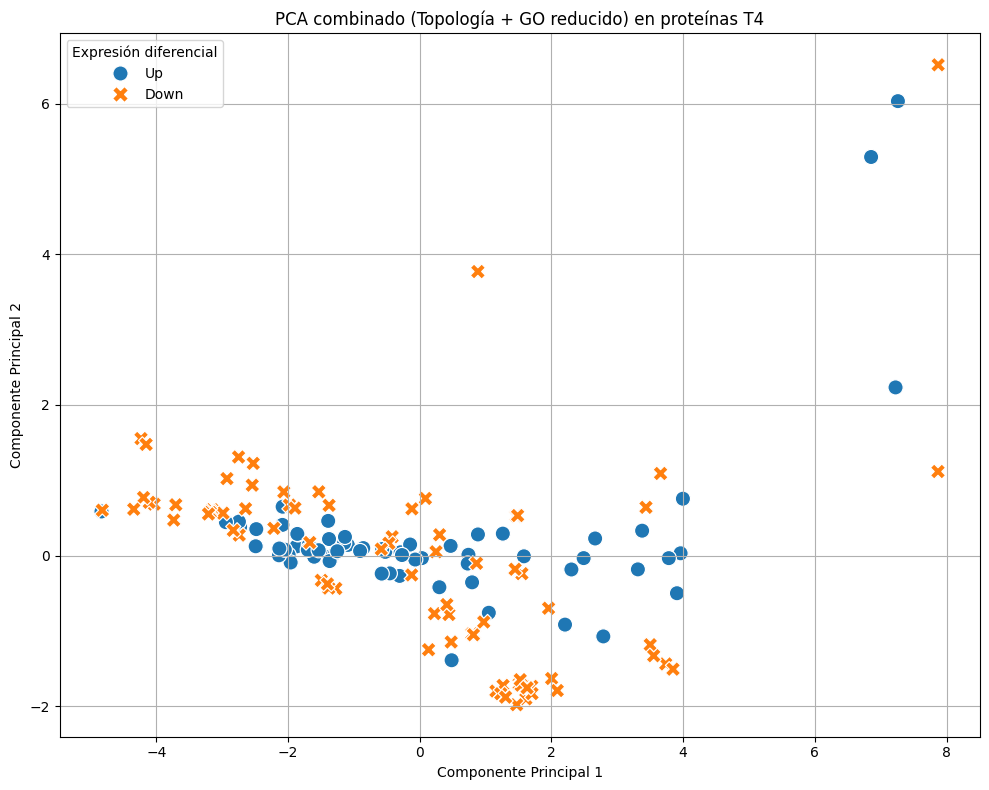

In [65]:
# Seleccionar métricas topológicas + GO reducidas
features_final = ['DC', 'BC', 'CC', 'EC', 'CEN', 'ECC', 'RAD', 'Conectivity_score_topo'] + [f'GO_PC{i+1}' for i in range(20)]
X_final = combined_df[features_final]

# Normalizar
scaler_final = StandardScaler()
X_final_scaled = scaler_final.fit_transform(X_final)

# PCA (2D para visualización)
pca_final = PCA(n_components=2, random_state=42)
X_final_pca = pca_final.fit_transform(X_final_scaled)

# Visualización
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_final_pca[:, 0], y=X_final_pca[:, 1],
                hue=combined_df['prediction'], style=combined_df['prediction'], s=120)
plt.title('PCA combinado (Topología + GO reducido) en proteínas T4')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Expresión diferencial')
plt.grid(True)
plt.tight_layout()
plt.show()


### T-SNE y visualización

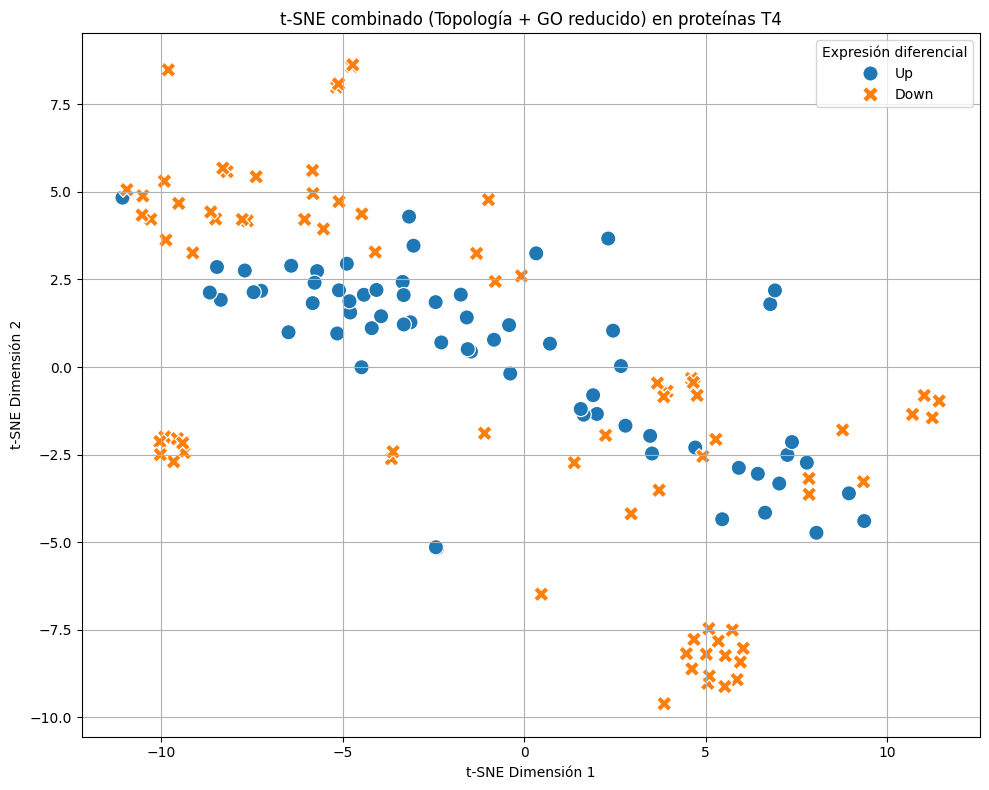

In [66]:
# t-SNE
tsne_final = TSNE(n_components=2, perplexity=30, random_state=42)
X_final_tsne = tsne_final.fit_transform(X_final_scaled)

# Visualización
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_final_tsne[:, 0], y=X_final_tsne[:, 1],
                hue=combined_df['prediction'], style=combined_df['prediction'], s=120)
plt.title('t-SNE combinado (Topología + GO reducido) en proteínas T4')
plt.xlabel('t-SNE Dimensión 1')
plt.ylabel('t-SNE Dimensión 2')
plt.legend(title='Expresión diferencial')
plt.grid(True)
plt.tight_layout()
plt.show()


### Visualización y priorización con p-value de GO

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar enriquecimiento GO
go_enrich = pd.read_csv(r"C:\Users\Macarena Madrid\Desktop\alzheimer-target-prediction\data\processed\raw_cleaned\go_enrichment_clean.csv")

# Verificar estructura
print(go_enrich.head())


   Rank                                    Term_Name_Clean             GO  \
0     1                            Protein Phosphorylation  GO:0006468_BP   
1     2                                    Phosphorylation  GO:0016310_BP   
2     3  Positive Regulation Of DNA-templated Transcrip...  GO:0045893_BP   
3     4  Positive Regulation Of Nucleic Acid-Templated ...  GO:1903508_BP   
4     5                       Protein Modification Process  GO:0036211_BP   

         P-value    Z-score  Combined_Score  \
0  2.196107e-120  10.371111     2857.484956   
1   2.023750e-88   8.128998     1641.427871   
2   1.149844e-78   3.041530      545.839131   
3   8.127226e-68   4.633815      715.834306   
4   2.927007e-63   3.670553      528.518884   

                                   Overlapping genes  Adjusted p-value  \
0  ATF2, MAML1, TESK2, LIPE, TBK1, AKT2, PRKACG, ...     1.175357e-116   
1  EPHB6, PANK2, TP53RK, MAML1, TESK2, RPS6KA4, L...      5.415555e-85   
2  ATF1, ATF2, SPI1, MAML1, TRRA

In [69]:
# Ordenar por p-valor ajustado (menor es más significativo)
go_top = go_enrich.sort_values("Adjusted p-value").head(10)
print(go_top[['Term_Name_Clean', 'GO', 'Adjusted p-value', 'Ontology', 'Overlapping genes']])


                                        Term_Name_Clean             GO  \
0                               Protein Phosphorylation  GO:0006468_BP   
5352           Protein Serine/Threonine Kinase Activity  GO:0004674_MF   
6461           Intracellular Membrane-Bounded Organelle  GO:0043231_CC   
6462                                            Nucleus  GO:0005634_CC   
1                                       Phosphorylation  GO:0016310_BP   
2     Positive Regulation Of DNA-templated Transcrip...  GO:0045893_BP   
3     Positive Regulation Of Nucleic Acid-Templated ...  GO:1903508_BP   
6463                       Mitochondrial Inner Membrane  GO:0005743_CC   
4                          Protein Modification Process  GO:0036211_BP   
6464                           Organelle Inner Membrane  GO:0019866_CC   

      Adjusted p-value Ontology  \
0        1.175357e-116       BP   
5352     5.006595e-112       MF   
6461     3.730536e-101       CC   
6462      1.240436e-90       CC   
1         

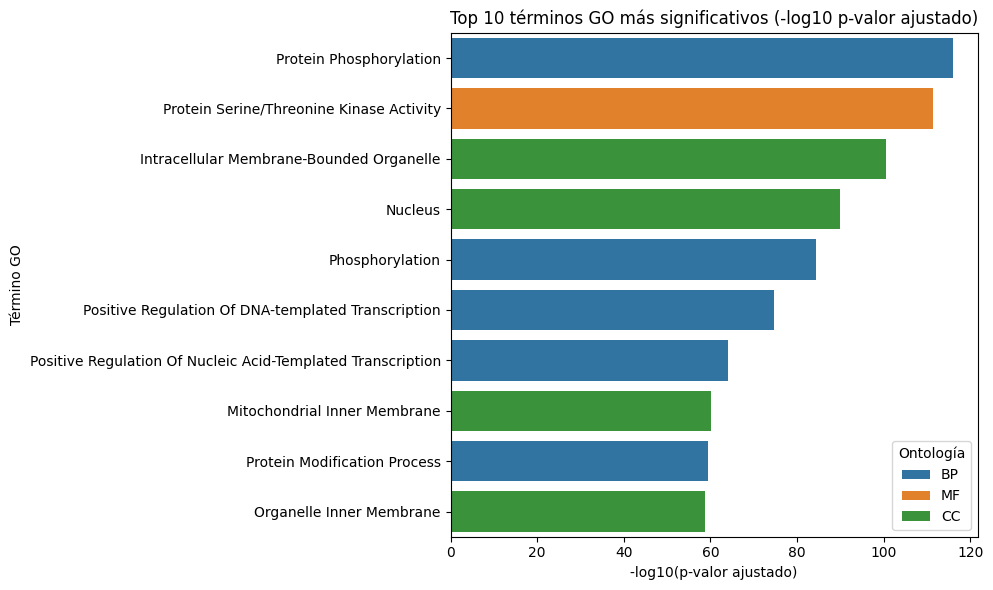

In [71]:
plt.figure(figsize=(10,6))
sns.barplot(data=go_top, 
            y='Term_Name_Clean', 
            x=-np.log10(go_top['Adjusted p-value']), 
            hue='Ontology')
plt.title("Top 10 términos GO más significativos (-log10 p-valor ajustado)")
plt.xlabel("-log10(p-valor ajustado)")
plt.ylabel("Término GO")
plt.legend(title="Ontología")
plt.tight_layout()
plt.show()


In [72]:
from collections import Counter

# Unir todos los genes de los 10 términos más significativos
all_genes = []
for genes in go_top['Overlapping genes']:
    all_genes.extend(str(genes).split(','))

gene_counts = Counter(all_genes)
print("Genes más recurrentes en los GO más significativos:")
print(gene_counts.most_common(10))


Genes más recurrentes en los GO más significativos:
[(' AKT1', 8), (' HIPK2', 8), (' MAP2K1', 8), (' DYRK1A', 8), (' DYRK1B', 8), (' PRKAA1', 8), (' PINK1', 8), (' CHEK2', 8), (' CAMK4', 8), (' TGFBR1', 8)]


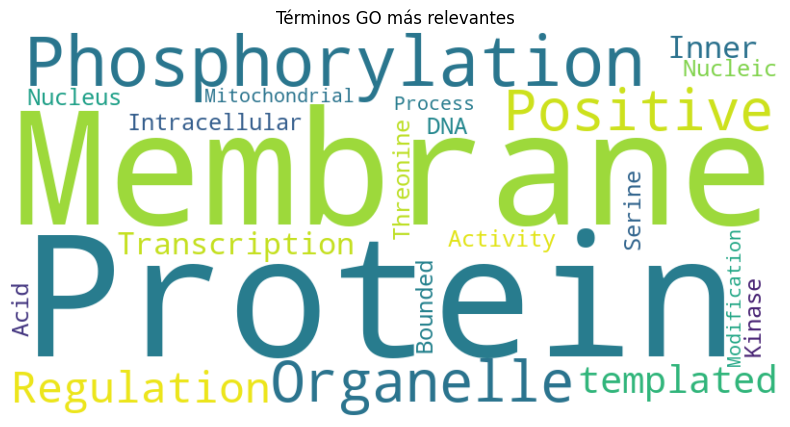

In [74]:
from wordcloud import WordCloud

text = " ".join(go_top['Term_Name_Clean'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Términos GO más relevantes')
plt.show()


### relevancia


In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Rutas de tus archivos (ajusta si es necesario)
data_dr = r"C:\Users\Macarena Madrid\Desktop\alzheimer-target-prediction\data\processed\raw_cleaned"

# Cargar atributos de proteínas
target = pd.read_csv(f"{data_dr}\\target_clean.csv")

# Cargar enriquecimiento GO
go_enrich = pd.read_csv(f"{data_dr}\\go_enrichment_clean.csv")

# Mostrar columnas importantes para verificar
print(target.columns)
print(go_enrich.columns)



Index(['Target_name', 'Complex_participants', 'Node_id', 'Target_type',
       'Target_group', 'Target_group_score_normalized', 'Conectivity_Score'],
      dtype='object')
Index(['Rank', 'Term_Name_Clean', 'GO', 'P-value', 'Z-score', 'Combined_Score',
       'Overlapping genes', 'Adjusted p-value', 'Ontology'],
      dtype='object')


In [83]:
genes_recurrentes = ['AKT1', 'HIPK2', 'MAP2K1', 'DYRK1A', 'DYRK1B', 'PRKAA1', 'PINK1', 'CHEK2', 'CAMK4', 'TGFBR1']

print("Genes recurrentes:", genes_recurrentes)


Genes recurrentes: ['AKT1', 'HIPK2', 'MAP2K1', 'DYRK1A', 'DYRK1B', 'PRKAA1', 'PINK1', 'CHEK2', 'CAMK4', 'TGFBR1']


In [91]:
# Filtrar solo proteínas individuales (no complejos)
indivs = target

# Buscar las filas cuyo nombre del gen esté en los recurrentes
genes_df = indivs[indivs['Node_id'].isin(genes_recurrentes)]

# Ver tabla
print(genes_df[['Node_id', 'Target_name', 'Target_group', 'Target_type','Target_group_score_normalized', 'Conectivity_Score']])


     Node_id                                        Target_name Target_group  \
31    DYRK1A  dual-specificity tyrosine-phosphorylation regu...       T1, T2   
503     AKT1                serine/threonine-protein kinase akt           T2   
582    CAMK4                                      cam kinase iv           T2   
619    CHEK2               serine/threonine-protein kinase chk2           T2   
945   DYRK1B  dual specificity tyrosine-phosphorylation-regu...           T2   
1052   HIPK2           homeodomain-interacting protein kinase 2           T2   
1122  MAP2K1  dual specificity mitogen-activated protein kin...           T2   
1327  PRKAA1      amp-activated protein kinase, alpha-1 subunit           T2   
1497  TGFBR1                           tgf-beta receptor type i           T2   
4391   PINK1  serine/threonine-protein kinase pink1, mitocho...           T4   

         Target_type  Target_group_score_normalized  Conectivity_Score  
31    SINGLE PROTEIN                       0.9

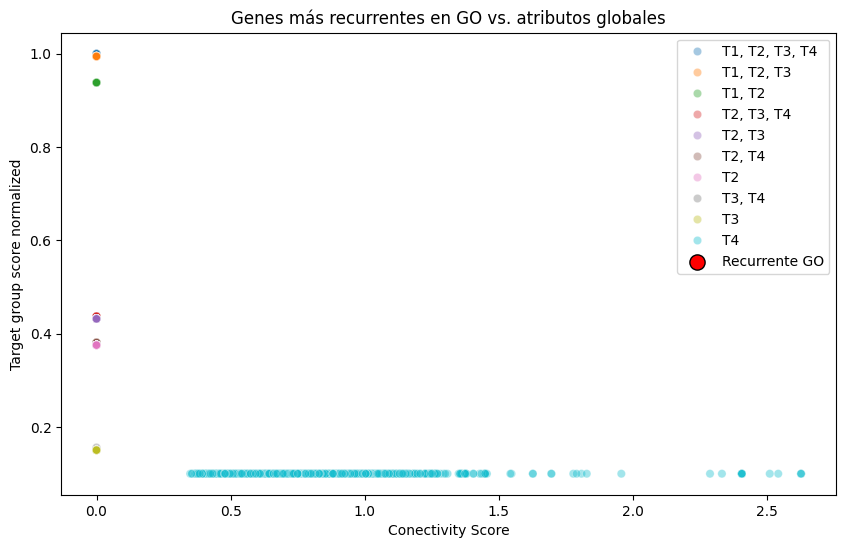

In [92]:
# Agregar columna para marcar si es gen recurrente GO
indivs['Recurrente_GO'] = indivs['Target_name'].isin(genes_recurrentes)

plt.figure(figsize=(10,6))
sns.scatterplot(data=indivs, x='Conectivity_Score', y='Target_group_score_normalized',
                hue='Target_group', alpha=0.4, legend='brief')
# Resaltar genes recurrentes GO
rec = indivs[indivs['Recurrente_GO']]
plt.scatter(rec['Conectivity_Score'], rec['Target_group_score_normalized'],
            color='red', s=120, edgecolor='black', label='Recurrente GO')
plt.title("Genes más recurrentes en GO vs. atributos globales")
plt.xlabel("Conectivity Score")
plt.ylabel("Target group score normalized")
plt.legend()
plt.show()
